##Реализация Алгоритма k-means

In [91]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1500
n_clusters = 9


#X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = n_clusters, random_state = 999)
#X_start = np.copy(X)

Populating the interactive namespace from numpy and matplotlib


##Ручная генерация точек

In [92]:
def random_points(n_samples, random_state=0):
    array_of_points = np.zeros(n_samples, dtype=float)
    states_amount = 7
    parts = n_clusters#np.random.randint(1, n_clusters, dtype=int)
    if (random_state % states_amount == 0):
        array_of_points[:, 0] = np.random.random_sample(n_samples[0])
        array_of_points[:, 1] = np.random.random_sample(n_samples[0])
    if (random_state % states_amount == 1):
        array_of_points[:, 0] = np.random.random_sample(n_samples[0])
        array_of_points[:, 1] = np.random.random_sample(n_samples[0]) ** np.random.random_sample(n_samples[0]) + np.sqrt( np.random.random_sample(n_samples[0]) )
    if (random_state % states_amount == 2):
        array_of_points[:, 0] = np.random.random_sample(n_samples[0]) + np.sqrt(np.random.random_sample(n_samples[0]))
        array_of_points[:, 1] = np.random.random_sample(n_samples[0]) ** (np.random.random_sample(n_samples[0]) * 20)
    if (random_state % states_amount == 3):
        array_of_points[:, 0] = np.random.random_sample(n_samples[0]) / (np.random.random_sample(n_samples[0]) * 10) 
        array_of_points[:, 1] = np.random.random_sample(n_samples[0]) * np.random.random_sample(n_samples[0]) * np.random.random_sample(n_samples[0]) * np.random.random_sample(n_samples[0])
    if (random_state % states_amount == 4):
        array_of_points[:, 0] = np.random.random_sample(n_samples[0]) * np.random.randint(-3*n_samples[0], 0, n_samples[0])
        array_of_points[:, 1] = np.random.random_sample(n_samples[0]) ** np.random.random_sample(n_samples[0]) + np.sqrt( np.random.random_sample(n_samples[0]) )
    if (random_state % states_amount == 5):
        for i in range(parts):
            slice1 = i * n_samples[0] // parts
            slice2 = (i + 1) * n_samples[0] // parts
            array_of_points[slice1:slice2, 0] = np.random.random_sample(slice2 - slice1) + np.sqrt(i * np.random.random_sample(slice2 - slice1))
            array_of_points[slice1:slice2, 1] = np.random.random_sample(slice2 - slice1) + i ** 2
    if (random_state % states_amount == 6):
        for i in range(parts):
            slice1 = i * n_samples[0] // parts
            slice2 = (i + 1) * n_samples[0] // parts
            array_of_points[slice1:slice2, 0] = [(x+1500)*0.01 for x in range(slice2 - slice1)]
            array_of_points[slice1:slice2, 1] = [(y+i*i*np.log(i+1)) for y in range(slice2 - slice1)]
    return array_of_points


X = random_points((n_samples, 2), random_state=1)
X_start = np.copy(X)

**Генерируем центры (самый простой способ)**

In [93]:
#creating centers
#np.random.seed(4)
def centers_creation(array_of_points):
    centers_of_points = np.empty((0, 2))
    for i in range(n_clusters):
        rand_line = np.random.randint(0, n_samples)
        #print( rand_line )
        centers_of_points = np.append(centers_of_points, array_of_points[rand_line, :])
    centers_of_points = np.reshape(centers_of_points, (n_clusters, 2))
    return centers_of_points

centers = centers_creation(X)
centers_start = np.copy(centers)

**Сделаем чуть интереснее:**

In [94]:
#smart_centers = np.empty((0, 2))
#smart_centers = np.append(smart_centers, X[rand_line, :])
#values = list()
#for i in range(1, n_clusters):
#    smart_centers = np.reshape(smart_centers, (i, 2))
#    coord_difference = X[:, None] - smart_centers
#    dist = np.linalg.norm(coord_difference, axis=2)
#    
#    mask = np.logical_not(np.isin(dist, values))
#    #print(dist)
#    #print([x for x in dist if x not in values])
#    #print(dist[mask])
#    #print(np.max(dist[mask]))
#    values.append(np.max(dist[mask]))
#    #print(np.max(dist[1 not in values]))
#    #print(dist[dist not in values])
#    #print(np.argsort(dist, axis=1)[-1][-1])
#    print(dist, "= dist")
#    #print(np.argsort(dist, axis=0))
#    line_number = np.argsort(dist)[-1][-1]
#    smart_centers = np.append(smart_centers, X[line_number, :])
#print(values)
#smart_centers = np.reshape(smart_centers, (n_clusters, 2))
#print(smart_centers)

In [95]:
#adding to X clusters column
clusters = np.random.randint(0, n_clusters, (n_samples, 1))
clusters_start = np.copy(clusters)
X_with_clusters = np.append(X, clusters, axis=1)
X_with_clusters_start = np.copy(X_with_clusters)

Начальное состояние:

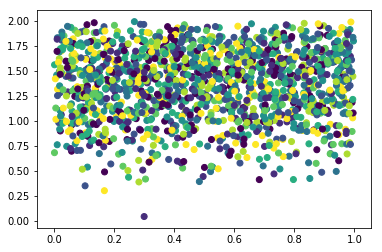

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

In [97]:
#X_with_clusters[:, 2]

**Сам алгоритм:**

In [99]:
import time
#print( np.shape(cur_clusters) )


def k_means_algorithm(array_of_points, array_of_points_with_clusters, centers_of_clusters):
    cur_clusters = np.zeros(n_samples, float)
    difference = -1
    while (np.max(difference) != 0):
        prev_centers_of_clusters = np.copy(centers_of_clusters)
        center_array_of_points_difference = array_of_points[:, None] - centers_of_clusters
        cur_clusters = np.argsort(np.linalg.norm(center_array_of_points_difference, axis=2), axis=1)[:, 0]
        array_of_points_with_clusters[:, 2] = cur_clusters    
        for k in range(n_clusters):
            power_of_cluster = np.alen(array_of_points[array_of_points_with_clusters[:,2] == k ])
            if power_of_cluster != 0:
                centers_of_clusters[k, :] = np.nansum(array_of_points[array_of_points_with_clusters[:, 2] == k], axis=0) / power_of_cluster
        difference = np.linalg.norm((centers_of_clusters - prev_centers_of_clusters), axis=1)
    return array_of_points, array_of_points_with_clusters


start_time = time.clock()
X, X_with_clusters = k_means_algorithm(array_of_points=X_start, array_of_points_with_clusters=X_with_clusters_start, centers_of_clusters=centers_start)
print(time.clock() - start_time)


0.05070199999999758


**После работы алгоритма c обычными центрами:**

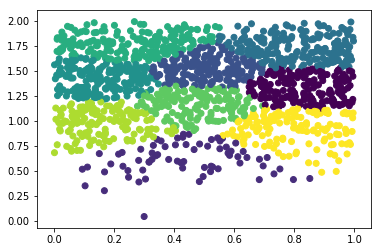

In [100]:
X_with_clusters.astype(int)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

**С чуть более умной расстановкой:**

In [101]:
##start_time = time.clock()
##X, X_with_clusters = k_means_algorithm(X=X_start, X_with_clusters=X_with_clusters_start, centers=smart_centers)
##print(time.clock() - start_time)
##X_with_clusters.astype(int)
##plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

**Сравним с работой алгоритма KMeans( sklearn )**

0.1411699999999989


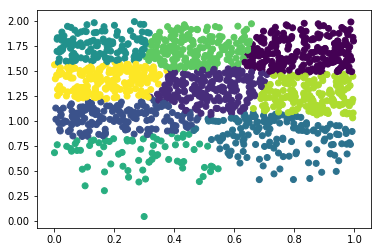

In [102]:
from sklearn.cluster import KMeans
X1 = np.copy(X_start)
time_start2 = time.clock()
a = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X1)
print( time.clock() - time_start2 )

plt.scatter(X1[:, 0], X1[:, 1], c=a)

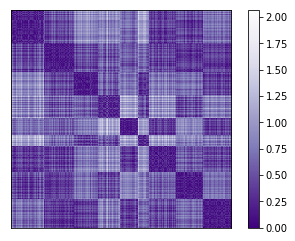

In [103]:
i  = np.argsort(a)
X2 = X1[i, :]

D = (X2[:,0][:, np.newaxis] - X2[:,0]) ** 2
D += (X2[:,1][:, np.newaxis] - X2[:,1]) ** 2
D = np.sqrt(D)

plt.figure(figsize=(5, 4))
plt.imshow(D, cmap='Purples_r', aspect='auto')
plt.xticks([])
plt.yticks([])
plt.colorbar(orientation='vertical', pad=0.06);

##Поиск моделей, на которых k-means( из sklearn ) работает не так, как мы ожидаем:

**1) Две окружности, одна из которых достаточно маленького радиуса, находящаяся внутри окр. бОльшего радиуса**

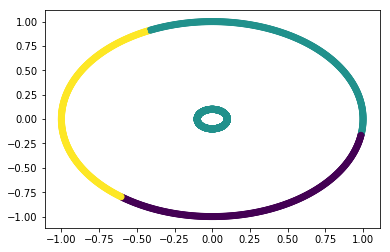

In [104]:
from sklearn.datasets import make_circles
X1 = make_circles(n_samples=n_samples, random_state=2, factor=.1)
X1 = np.array(X1[0])
a = KMeans(n_clusters=3, random_state=0).fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=a)



**2) Алгоритм плохо кластеризует окружности( этот пример чем-то похож на тот, который был на лекции )**

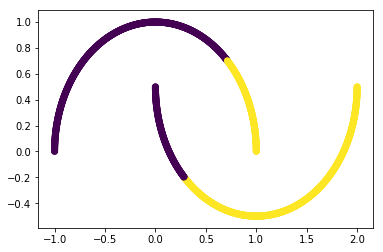

In [105]:
from sklearn.datasets import make_moons
X1, y = make_moons(n_samples=n_samples, random_state=11)
X1_with_clusters = np.append(X, make_moons(n_samples=n_samples, shuffle=True, random_state=10)[0], axis=0 )
a = KMeans(n_clusters=2, random_state=0).fit_predict(X1)
plt.scatter(X1[:,0], X1[:, 1], c=a)


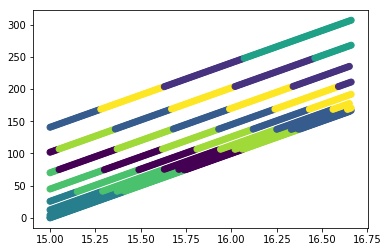

In [106]:
X = random_points((n_samples, 2), random_state=6)
n_samples = 1500
n_clusters = 8
centers_creation(X)
X_with_clusters = np.append(X, clusters, axis=1)
a = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c=a)


##Модели, на которых не работает алгоритм, реализованный мной:

####1)Достаточно много параллельных прямых( с осью Ох ) с возрастающим расстоянием между ними 

[[ 0.88612249  0.68484361 12.        ]
 [ 0.92870559  0.67113592 12.        ]
 [ 0.80766552  0.91033714 12.        ]
 [ 0.48534475  0.42131277 12.        ]
 [ 0.14673801  0.23559967 12.        ]
 [ 0.68224194  0.30907957 12.        ]
 [ 0.79525593  0.95480866 12.        ]
 [ 0.98058549  0.77821352 12.        ]
 [ 0.60747783  0.26023601 12.        ]
 [ 0.59335106  0.34481021 12.        ]]


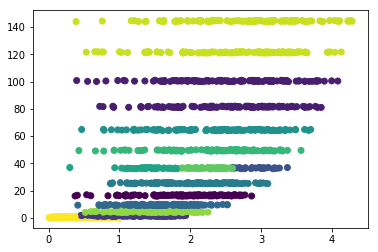

In [107]:
n_samples = 1500
n_clusters = 13
X3= random_points((n_samples, 2), random_state=5)
centers = centers_creation(X3)
X3_with_clusters = np.append(X3, clusters, axis=1)
X3, X3_with_clusters = k_means_algorithm(array_of_points=X3, array_of_points_with_clusters=X3_with_clusters, centers_of_clusters=centers)
print(X3_with_clusters[:10])
X3_with_clusters.astype(int)
plt.scatter(X3[:, 0], X3[:, 1], c=X3_with_clusters[:, 2])

####2)Достаточно много параллельных прямых( пересекающих Ох ) с постоянным расстоянием между ними ( kMeans из sklearn выполняет кластеризацию аналогично )

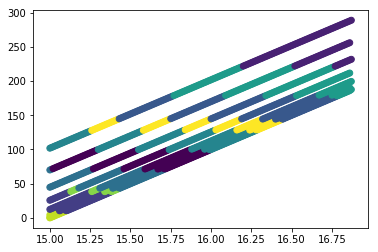

In [110]:
X = random_points((n_samples, 2), random_state=6)
n_samples = 1500
n_clusters = 8
centers_creation(X)
X_with_clusters = np.append(X, clusters, axis=1)
X, X_with_clusters = k_means_algorithm(array_of_points=X, array_of_points_with_clusters=X_with_clusters, centers_of_clusters=centers)
X_with_clusters.astype(int)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])